In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from mpl_toolkits import mplot3d

In [2]:
#returns matrix element of dirac hamiltonian for given k, 
# this is much cleaner to read in the function H
def d_entry(K, vf):
    return -1 * (K[0] + 1j * K[1]) * vf #* 1.5 #* (1 - 9 * (0.14) ** 2)

def rotate(vec, theta):
    return np.dot(np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]), vec)

def rotate_special(vec, center, theta):
    vec = vec + center
    vec = rotate(vec, theta)
    vec = vec - center
    return vec

def H(kx, ky, Gs, K, t, theta, vf, U=0):
    
    deltaK = np.array([0,2 * K * np.sin(theta / 2)])
    
    dk = np.array([kx, ky])
    G1, G2 = Gs
    G1_minus = rotate(G1, -theta/2)
    G1_plus = rotate(G1, theta/2)
    G2_minus = rotate(G2, -theta/2)
    G2_plus = rotate(G2, theta/2)

    G1_minus = G1
    G1_plus = G1
    G2_minus = G2
    G2_plus = G2

    ts = np.array([[t, t, t, t], [t, t * np.exp(1j * (2 * np.pi / 3)), t * np.exp(-1j * (2 * np.pi / 3)), t * np.exp(-1j * (2 * np.pi / 3))],
                   [t, t * np.exp(-1j * (2 * np.pi / 3)), t * np.exp(1j * (2 * np.pi / 3)), t * np.exp(1j * (2 * np.pi / 3))]])

    #ilegible but this is the UR of the hamiltonian 
    H_init = np.matrix([[0, d_entry(deltaK / 2 + dk, vf), ts[1, 2], ts[1, 1], ts[2, 2], ts[2,1], ts[0, 0], ts[0, 0], 0, 0, 0, 0],
                       [0, 0, ts[1, 0], ts[1, 3], ts[2, 0], ts[2, 3], ts[0,0], ts[0,0], 0, 0, 0, 0],
                       [0, 0, 0, d_entry(-deltaK / 2 + dk + G1_plus, vf), 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, d_entry(-deltaK / 2 + dk + G1_plus + G2_plus, vf), 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, d_entry(-deltaK / 2 + dk, vf), ts[1, 2].conjugate(), ts[1, 1].conjugate(), ts[2, 2].conjugate(), ts[2, 1].conjugate()],
                       [0, 0, 0, 0, 0, 0, 0, 0, ts[1, 0].conjugate(), ts[1, 3].conjugate(), ts[2, 0].conjugate(), ts[2, 3].conjugate()],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, d_entry(deltaK / 2 + dk - G1_minus, vf), 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, d_entry(deltaK / 2 + dk - G1_minus - G2_minus, vf)],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        ])
    
    V = np.zeros_like(H_init)
    
    for i in range(2):
        V[i, i] = -U / 2
    for i in range(2, 9):
        V[i, i] = U / 2
    for i in range(9,12):
        V[i, i] = -U / 2
    
    H_init = H_init

    H_tot = H_init + H_init.H
    H_tot = H_tot + V
    eigvals = LA.eigvalsh(H_tot)
    return eigvals

def H_new(kx, ky, Gs, K, t, theta, vf, U=0):
    
    #note dk is the distance from the origin in the theta=0 coordinate frame
    #in this construction layer 2 is rotated by theta/2 and layer 1 is rotated 
    # by -theta/2

    deltaK = np.array([0,2 * K * np.sin(theta / 2)])
    K_vec = np.array([K * np.cos(theta / 2), 0])
    center = np.array([0,0])
    dk = np.array([kx, ky])
    G1, G2 = Gs

    dentry = lambda vec, theta: -vf * (vec[0] + 1j * vec[1]) * np.exp(-1j * theta)
    theta = 0
    d1 = dentry(dk + deltaK / 2, -theta/2)
    d2 = dentry(dk - deltaK / 2, theta/2)
    d3 = dentry(dk - deltaK / 2 + G1, theta/2)
    d4 = dentry(dk - deltaK / 2 + G1 + G2, theta/2)
    d5 = dentry(dk + deltaK / 2 - G1, -theta/2)
    d6 = dentry(dk + deltaK / 2 - G1 - G2, -theta/2)

    ts = np.array([[t, t, t, t], [t, t * np.exp(1j * (2 * np.pi / 3)), t * np.exp(-1j * (2 * np.pi / 3)), t * np.exp(-1j * (2 * np.pi / 3))],
                   [t, t * np.exp(-1j * (2 * np.pi / 3)), t * np.exp(1j * (2 * np.pi / 3)), t * np.exp(1j * (2 * np.pi / 3))]])

    #ilegible but this is the UR of the hamiltonian 
    H_init = np.matrix([[0, d1, ts[1, 2], ts[1, 1], ts[2, 2], ts[2,1], ts[0, 0], ts[0, 0], 0, 0, 0, 0],
                       [0, 0, ts[1, 0], ts[1, 3], ts[2, 0], ts[2, 3], ts[0,0], ts[0,0], 0, 0, 0, 0],
                       [0, 0, 0, d2, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, d3, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, d4, ts[1, 2].conjugate(), ts[1, 1].conjugate(), ts[2, 2].conjugate(), ts[2, 1].conjugate()],
                       [0, 0, 0, 0, 0, 0, 0, 0, ts[1, 0].conjugate(), ts[1, 3].conjugate(), ts[2, 0].conjugate(), ts[2, 3].conjugate()],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, d5, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, d6],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        ])
    
    V = np.zeros_like(H_init)
    
    for i in range(2):
        V[i, i] = -U / 2
    for i in range(2, 9):
        V[i, i] = U / 2
    for i in range(9,12):
        V[i, i] = -U / 2
    
    H_init = H_init

    H_tot = H_init + H_init.H
    H_tot = H_tot + V
    eigvals = LA.eigvalsh(H_tot)
    return eigvals

#remplaza a linspace porque este es una mierda
def generate_vectors(A, B, C, N):
    A_hat = A / np.linalg.norm(A)
    step_size = C / (N - 1)
    
    vectors = np.array([B - (C / 2) * A_hat + i * step_size * A_hat for i in range(N)])
    
    return vectors

In [3]:
import numpy as np
t = 0.11
ts = np.array([[t, t, t, t], [t, t * np.exp(1j * (2 * np.pi / 3)), t * np.exp(-1j * (2 * np.pi / 3)), t * np.exp(-1j * (2 * np.pi / 3))],
                   [t, t * np.exp(-1j * (2 * np.pi / 3)), t * np.exp(1j * (2 * np.pi / 3)), t * np.exp(1j * (2 * np.pi / 3))]])

ts.reshape(3, 4)


array([[ 0.11 +0.j        ,  0.11 +0.j        ,  0.11 +0.j        ,
         0.11 +0.j        ],
       [ 0.11 +0.j        , -0.055+0.09526279j, -0.055-0.09526279j,
        -0.055-0.09526279j],
       [ 0.11 +0.j        , -0.055-0.09526279j, -0.055+0.09526279j,
        -0.055+0.09526279j]])

In [4]:
i = 8
theta = np.arccos((3 * i ** 2 + 3 * i + 0.5) / (3 * i ** 2 + 3 * i + 1))
t2 = (np.pi-theta) / 2
t3 =t2+theta-np.pi/2
a1 = np.array([1, np.sqrt(3)]) / 2
a2 = np.array([-1, np.sqrt(3)]) / 2

G1 = (4 * np.pi) * ((3 * i + 1) * a1 + a2) / (3 * (3 * i ** 2 + 3 * i + 1))
G2 = (4 * np.pi) * (-(3 * i + 2) * a1 + (3 * i + 1) * a2) / (3 * (3 * i ** 2 + 3 * i + 1))
Gs = (G1, G2)

#t tilde is the interlayer hopping parameter
t = 0.11
K = 4 * np.pi / 3
U = 0
deltaK = 2 * K * np.sin(theta / 2)
vf = 0.76 / deltaK
deltaK_vec = np.array([0, deltaK]) #np.array([np.sin(t3) * deltaK, np.cos(t3) * deltaK])
G = np.sqrt(G2[0] ** 2 + G2[1] ** 2)


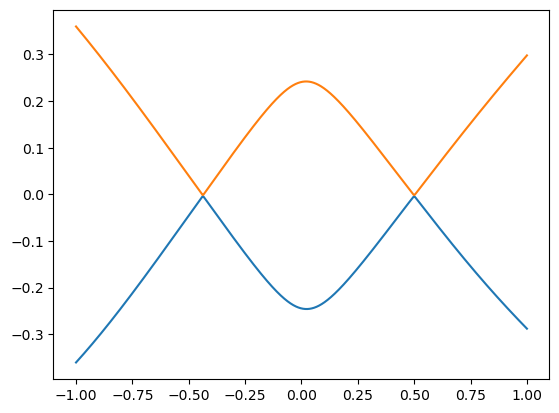

In [5]:
k = generate_vectors(deltaK_vec, np.array([0, 0]), 2 * deltaK, 10000)
kxs = k[:, 0]
kys = k[:, 1]
xs = np.linspace(-1, 1, 10000)

Es = np.array([H(kxs[i], kys[i], Gs, K, t, theta, vf, U=U)[5:7] for i in range(10000)])

plt.plot(xs, Es)
plt.show()

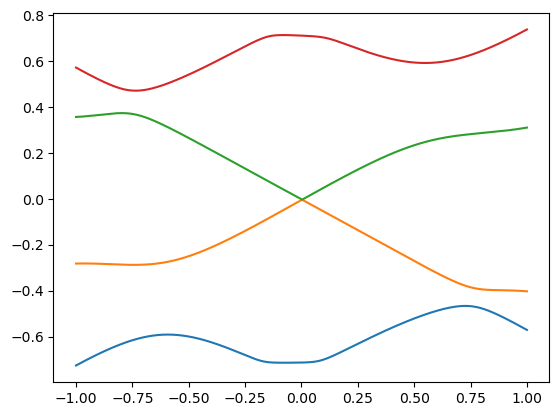

In [6]:
deltaK = 2 * K * np.sin(theta / 2)
vf = 0.76 / deltaK
deltaK_vec = np.array([0, deltaK])

xhat = np.array([1, 0])

k_foo = generate_vectors(xhat, deltaK_vec / 2, np.sqrt(3) * deltaK, 10000)
kxs = k_foo[:, 0]
kys = k_foo[:, 1]

Es = np.array([H(kxs[i], kys[i], Gs, K, t, theta, vf, U=U) for i in range(10000)])
xaxis = np.linspace(-1,1, 10000)

plt.plot(xaxis, Es[:, 4:8])
plt.show()

In [7]:
H(kxs[5000], kys[5000], Gs, deltaK_vec, t, theta, vf, U=U)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

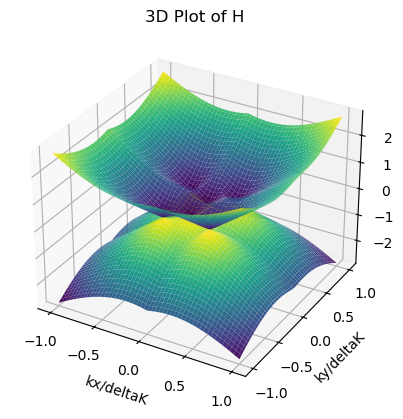

In [16]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = plt.axes(projection='3d')

kx = np.linspace(-1, 1, 100)
ky = np.linspace(-1, 1, 100)
# Create a meshgrid of kx and ky values
kx, ky = np.meshgrid(kx, ky)

# Evaluate H for each kx and ky value
H_vals_hole = np.array([H_new(kx[i, j], ky[i, j], Gs, K, t, theta, vf)[5] for i in range(kx.shape[0]) for j in range(kx.shape[1])])
H_vals_elec = np.array([H_new(kx[i, j], ky[i, j], Gs, K, t, theta, vf)[6] for i in range(kx.shape[0]) for j in range(kx.shape[1])])

# # Reshape H_vals to match the shape of kx and ky
H_vals_hole = H_vals_hole.reshape(kx.shape)
H_vals_elec = H_vals_elec.reshape(kx.shape)

# Plot the 3D surface
ax.plot_surface(kx, ky, H_vals_hole, cmap='viridis')
ax.plot_surface(kx, ky, H_vals_elec, cmap='viridis')

# Set labels and title
ax.set_xlabel('kx/deltaK')
ax.set_ylabel('ky/deltaK')
ax.set_zlabel('H')
ax.set_title('3D Plot of H')

# Show the plot
plt.show()

In [78]:
print(np.unravel_index(H_vals_elec.argmin(), H_vals_elec.shape))

(69, 69)


In [2]:
print(np.sqrt(np.dot(G1+G2, G1+G2)), G, deltaK * 4 / np.sqrt(3))
print(G2, G1+G2, deltaK_vec)

NameError: name 'np' is not defined

In [9]:
import numpy as np
from numpy import linalg as LA

# Create a random complex matrix
random_matrix = np.random.randn(10000, 10000) + 1j * np.random.randn(10000, 10000)
random_matrix = np.matrix(random_matrix)

# Make the matrix Hermitian
hermitian_matrix = (random_matrix + random_matrix.conj().T) / 2

# Print the Hermitian matrix
LA.eigvalsh(hermitian_matrix)